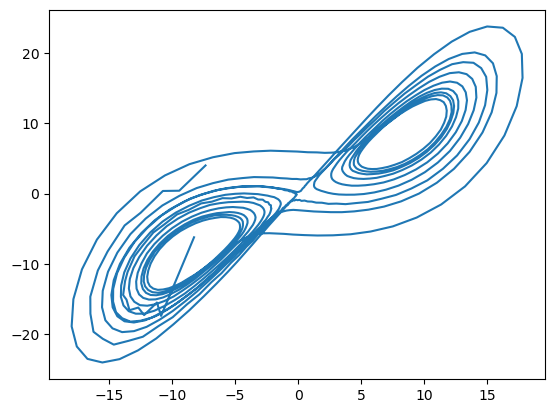

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dysts.flows import Lorenz, Hadley

## Load and simulate an attractor
model = Lorenz()
sol = model.make_trajectory(1000, resample=True, noise=0.01)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

In [34]:
from utils import train, make_dataset
# from train import train
from torch.optim import AdamW
import sys
%load_ext autoreload
%autoreload 2
sys.path.append("/om2/user/ostrow/NN_delay_embeddings/nn_delay_embeddings")
from src.models import LRU

lru = LRU(1,20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import torch.nn as nn
train_loader, val_loader, train_data, val_data = make_dataset(Lorenz, 1000, 20)
d = next(iter(train_loader))
d.shape

(20, 1000, 3) torch.Size([20, 1000, 1])
(20, 1000, 3) torch.Size([20, 1000, 1])


torch.Size([1, 1000, 1])

In [35]:

# model,train_set,val_set,epochs,lr,optimizer,loss_fn,device
lru, train_loss, val_loss = train(
    lru, train_loader, val_loader, 50, 1e-3, AdamW, nn.MSELoss(), "cuda"
)
plt.plot(train_loss)
plt.plot(val_loss)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 Training Loss: 44.22349610328674


  2%|▏         | 1/50 [00:02<02:24,  2.94s/it]

Epoch 0 Validation Loss: 16.933585548400877
Epoch 1 Training Loss: 15.99633240699768


  4%|▍         | 2/50 [00:05<02:08,  2.67s/it]

Epoch 1 Validation Loss: 15.211148834228515
Epoch 2 Training Loss: 13.29181411266327


  6%|▌         | 3/50 [00:07<02:01,  2.58s/it]

Epoch 2 Validation Loss: 14.030417680740356
Epoch 3 Training Loss: 12.382886171340942


  8%|▊         | 4/50 [00:10<01:56,  2.54s/it]

Epoch 3 Validation Loss: 12.854329824447632
Epoch 4 Training Loss: 11.215060758590699


 10%|█         | 5/50 [00:13<01:57,  2.62s/it]

Epoch 4 Validation Loss: 11.168924331665039
Epoch 5 Training Loss: 9.291741180419923


 12%|█▏        | 6/50 [00:15<01:52,  2.57s/it]

Epoch 5 Validation Loss: 8.418452262878418
Epoch 6 Training Loss: 6.606939256191254


 14%|█▍        | 7/50 [00:18<01:49,  2.54s/it]

Epoch 6 Validation Loss: 5.3087667465209964
Epoch 7 Training Loss: 4.043896496295929


 16%|█▌        | 8/50 [00:20<01:46,  2.53s/it]

Epoch 7 Validation Loss: 3.2097881555557253
Epoch 8 Training Loss: 2.558598744869232
